In [1]:
import pandas as pd
import numpy as np

In [89]:
raw_batting = pd.read_csv("./worldcup_data/all_players_batting_stats.csv")
raw_bowling = pd.read_csv("./worldcup_data/all_players_bowling_stats.csv")

In [90]:
raw_batting.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0', '4s', '6s', 'country'],
      dtype='object')

In [91]:
raw_bowling.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 'Wkts', 'BBI',
       'Ave', 'Econ', 'SR', '4', '5', 'Ct', 'St', 'country'],
      dtype='object')

In [92]:
raw_bowling.rename(columns={"Ave": "bowling_average", "SR": "bowling_strike_rate", "Runs": "runs_given"}, inplace=True)

In [93]:
raw_bowling = raw_bowling.drop(columns=["Span", "Mat", "Inns"], axis=1)

In [94]:
combined_stats = pd.merge(raw_batting, raw_bowling, on=["Player", "country"], how="inner")

In [95]:
combined_stats.country.nunique()

15

In [96]:
def calculate_num_seasons(span):
    years = [1975,1979,1983,1987,1992, 1996, 1999, 2003, 2007, 2011, 2015, 2019]
    start, end = span.split("-")
    if start == end:
        return 1
    start_idx = years.index(int(start))
    end_idx = years.index(int(end))
    return (end_idx - start_idx) + 1

In [97]:
combined_stats["num_seasons"] = combined_stats["Span"].apply(lambda x: calculate_num_seasons(x))

In [98]:
auction_list = pd.read_excel("./worldcup_data/official_auction_list.xlsx", sheet_name="Sheet1")

In [99]:
combined_stats.country.unique()

array(['India', 'Kenya', 'Australia', 'Bangladesh', 'England', 'Ireland',
       'Netherlands', 'NewZealand', 'Pakistan', 'Scotland', 'SouthAfrica',
       'SriLanka', 'WestIndies', 'Zimbabwe', 'Canada'], dtype=object)

In [100]:
auction_list.County.unique()

array(['CAN', 'ENG', 'INDIA', 'SL', 'AUS', 'SA', 'PAK', 'BDESH', 'WI',
       'NZ', 'ZIM', 'KENYA', 'IRE', 'SCOT', 'NL'], dtype=object)

In [5]:
country_mapping = {
    "CAN": "Canada",
    "ENG": "England",
    "INDIA": "India",
    "SL": "SriLanka",
    "AUS":"Australia",
    "SA": "SouthAfrica",
    "PAK": "Pakistan",
    "BDESH": "Bangladesh",
    "WI": "WestIndies",
    "NZ": "NewZealand",
    "ZIM": "Zimbabwe",
    "KENYA": "Kenya",
    "IRE": "Ireland",
    "SCOT": "Scotland",
    "NL": "Netherlands"
}

In [102]:
auction_list.shape

(210, 3)

In [103]:
combined_stats.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0', '4s', '6s', 'country', 'Overs', 'Mdns', 'runs_given',
       'Wkts', 'BBI', 'bowling_average', 'Econ', 'bowling_strike_rate', '4',
       '5', 'Ct', 'St', 'num_seasons'],
      dtype='object')

In [104]:
auction_list["country"] = auction_list.County.apply(lambda x: country_mapping[x])

In [105]:
auction_players = pd.merge(combined_stats, auction_list, on=["Player", "country"], how="inner")

In [106]:
auction_players.to_csv("./worldcup_data/official_auction_list_stats.csv", index=False)

### SEASON WISE STATS MERGING

In [6]:
new_official_list = pd.read_excel("./worldcup_data/WC ODI Auction Player List.xlsx", sheet_name="Player List")

In [7]:
new_official_list["country"] = new_official_list.Country.apply(lambda x: country_mapping[x])

### LOAD ALL THE INDIVIDUAL FILES

In [2]:
batting_df = pd.read_csv("./worldcup_data/batting_season_stats.csv")
bowling_df = pd.read_csv("./worldcup_data/bowling_season_stats.csv")

In [3]:
batting_df.shape

(1555, 16)

In [4]:
bowling_df.shape

(1555, 17)

In [11]:
bowling_df.rename(columns={"Ave": "bowling_average", "SR": "bowling_strike_rate", "Runs": "runs_given"}, inplace=True)

In [12]:
bowling_df = bowling_df.drop(columns=["Mat", "Inns"], axis=1)

In [13]:
combined_season_stats = pd.merge(batting_df, bowling_df, on=["Player", "country", "year"], how="inner")

In [14]:
combined_season_stats.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', '4s', '6s', 'country', 'year', 'Overs', 'Mdns', 'runs_given',
       'Wkts', 'BBI', 'bowling_average', 'Econ', 'bowling_strike_rate', '4',
       '5', 'Ct', 'St'],
      dtype='object')

In [15]:
official_auction_list_season = pd.merge(combined_season_stats, new_official_list, on=["Player", "country"], how="inner")

In [196]:
official_auction_list_season.to_csv("./worldcup_data/season_wise_combined_auction_list.csv", index=False)

NameError: name 'official_auction_list_season' is not defined

In [17]:
official_auction_list_season.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', '4s', '6s', 'country', 'year', 'Overs', 'Mdns', 'runs_given',
       'Wkts', 'BBI', 'bowling_average', 'Econ', 'bowling_strike_rate', '4',
       '5', 'Ct', 'St', 'Country', 'Role'],
      dtype='object')

### Analysing season stats

### Top 5 performers in each season

In [ ]:
official_auction_list_season.Runs = official_auction_list_season.Runs.apply(lambda x: float(x.replace('-', '0')))

In [43]:
official_auction_list_season.Wkts = official_auction_list_season.Wkts.apply(lambda x: float(x.replace('-', '0')))

In [59]:

top_batsman = official_auction_list_season.groupby(['year']).apply(lambda x: x.nlargest(5, 'Runs'))[["Runs", "Player", "year", "country"]].reset_index(drop=True)
top_bowlers = official_auction_list_season.groupby(['year']).apply(lambda x: x.nlargest(5, 'Wkts'))[["Wkts", "Player", "year", "country"]].reset_index(drop=True)

In [67]:
top_bowlers_unique = top_bowlers.groupby(['Player']).agg({"year": ['count']}).reset_index(drop=False)

In [69]:
top_bowlers_unique.columns = ["Player", "top5_times"]

In [70]:
top_bowlers_unique.columns

Index(['Player', 'top5_times'], dtype='object')

In [73]:
merged_bowlers = pd.merge(top_bowlers, top_bowlers_unique, on=["Player"], how="inner")

In [77]:
top_batsman_unique = top_batsman.groupby(['Player']).agg({"year": ['count']}).reset_index(drop=False)
top_batsman_unique.columns = ["Player", "top5_times"]

In [78]:
merged_batsman = pd.merge(top_batsman, top_batsman_unique, on=["Player"], how="inner")

In [79]:
merged_batsman.head()

,Runs,Player,year,country,top5_times
0,471.0,GA Gooch,1987,England,1
1,447.0,DC Boon,1987,Australia,2
2,368.0,DC Boon,1992,Australia,2
3,274.0,Javed Miandad,1987,Pakistan,2
4,437.0,Javed Miandad,1992,Pakistan,2


In [90]:
del top_batsman["Runs"]
del top_bowlers["Wkts"]

In [107]:
official_auction_list_season.Role.unique()

array(['Batsman', 'All Rounder', 'Bowler', 'Wicket Keeper'], dtype=object)

In [109]:
set(top_batsman_unique.Player).intersection(set(top_bowlers_unique.Player))

{'SR Waugh'}

In [128]:
def search_row(player):
    returnVal = False
    if player.Player in list(top_batsman_unique.Player):
        # Search top batsman unique list
        #print(f"player is {player.Player} and year is {player.year}")
        cnt = top_batsman[(top_batsman.Player == player.Player) & (top_batsman.year == player.year)].shape[0]
        #print(f"cnt is {cnt}")
        if cnt==1:
            returnVal = True
    if player.Player in list(top_bowlers_unique.Player):
        #print("Inside")
        # Search top bowlers unique list
        cnt = top_bowlers[(top_bowlers.Player == player.Player) & (top_bowlers.year == player.year)].shape[0]
        if cnt==1:
            returnVal = True
    return returnVal
    
    

In [102]:
top_players = list(top_batsman_unique.Player) + list(top_bowlers_unique.Player)
top_players_filtered = official_auction_list_season[official_auction_list_season.Player.isin(top_players)]

In [111]:
def search_in_top_list(df):
    df["top5_season"] = df.apply(lambda x: search_row(x), axis=1)
    return df

In [125]:
search_row(top_players_filtered.iloc[1])

Inside
player is M Azharuddin and year is 1992
cnt is 1


True

In [129]:
top_players_filtered_new = search_in_top_list(top_players_filtered)

/home/mancunian92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
top_players_filtered_new.top5_season.value_counts()

False    126
True      90
Name: top5_season, dtype: int64

In [132]:
top_players_filtered.to_csv("./worldcup_data/top_probables_season_data.csv", index=False)

### Analyzing sub standard players

In [197]:
overall_list = pd.read_csv("./worldcup_data/official_auction_list_stats.csv")

In [139]:
final_list = pd.read_csv("./worldcup_data/season_wise_combined_auction_list.csv")

In [140]:
non_numeric_cols = ["Player", "year", "Role", "Country", "BBI", "HS", "country", "Mat", "4s", "6s", "Ct", "St"]
for col in set(final_list.columns).difference(set(non_numeric_cols)):
    
    final_list[col] = final_list[col].apply(lambda x: float(x.replace('-', '0')))

In [142]:
final_list["dismissals"] = final_list["Ct"] + final_list["St"]

In [84]:
s2015["run_points"] = (s2015["Runs"].rank(ascending=False)/s2015.shape[0]) * 100
s2019["run_points"] = (s2019["Runs"].rank(ascending=False)/s2019.shape[0]) * 100


/home/mancunian92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mancunian92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
def year_role_df(df):
    df_dict = {}
    for role in df.Role.unique():
        for year in df.year.unique():
            f_df = df[(df.Role==role) & (df.year==year)]
            print(f_df.shape)
            if role in "Batsman":
                f_df["rating"] = (f_df["Runs"].rank(ascending=False)/f_df.shape[0]) * 100
            elif role in "Bowler":
                f_df["rating"] = (f_df["Wkts"].rank(ascending=False)/f_df.shape[0]) * 100
            elif role in "All Rounder":
                f_df["rating"] = 0.5 * ((f_df["Runs"].rank(ascending=False)/f_df.shape[0]) * 100) + 0.5 * ((f_df["Wkts"].rank(ascending=False)/f_df.shape[0]) * 100)
            elif role in "Wicket Keeper":
                f_df["rating"] = 0.8 * ((f_df["Runs"].rank(ascending=False)/f_df.shape[0]) * 100) + 0.2 * ((f_df["dismissals"].rank(ascending=False)/f_df.shape[0])*100)
            else:
                print("Why am i here ?", role, year)
            df_dict[str(role)+"_"+str(year)] = f_df
    return df_dict
            

In [188]:
def get_rating(player):
    try:
        key = str(player.Role)+"_"+str(player.year)
        df = df_dict[key]
        rate= df[df.Player==player.Player].rating
        return rate.values[0]
    except e as Exception:
        print(f_df.columns)
        print(key)
        print(player.Player)

In [189]:
final_list["rating"] = final_list.apply(lambda x: get_rating(x), axis=1)

In [195]:
rating_df = final_list[["Player", "rating"]].groupby(['Player']).agg({"rating": ["mean", "median"]}).reset_index(drop=False)
rating_df.columns = ["Player", "mean_rating", "median_rating"]

In [202]:
rating_df.dtypes

Player            object
mean_rating      float64
median_rating    float64
dtype: object

In [203]:
overall_list.dtypes

Player                  object
Span                    object
Mat                      int64
Inns                     int64
NO                       int64
Runs                     int64
HS                      object
Ave                     object
BF                       int64
SR                     float64
100                      int64
50                       int64
0                        int64
4s                      object
6s                      object
country                 object
Overs                   object
Mdns                    object
runs_given              object
Wkts                    object
BBI                     object
bowling_average         object
Econ                    object
bowling_strike_rate     object
4                       object
5                       object
Ct                       int64
St                       int64
num_seasons              int64
Role                    object
dtype: object

In [205]:
official_list = pd.merge(overall_list, rating_df, on="Player", how="inner")

In [14]:
official_list.to_csv("./worldcup_data/all_players_rated_with_stats.csv", index=False)

In [15]:
official_list = pd.read_csv("./worldcup_data/all_players_rated_with_stats.csv")

In [16]:
official_list[official_list.Role=="Batsman"].to_csv("./worldcup_data/batsman_rated_with_stats.csv", index=False)
official_list[official_list.Role=="Bowler"].to_csv("./worldcup_data/bowlers_rated_with_stats.csv", index=False)
official_list[official_list.Role=="All Rounder"].to_csv("./worldcup_data/AR_rated_with_stats.csv", index=False)
official_list[official_list.Role=="Wicket Keeper"].to_csv("./worldcup_data/WK_rated_with_stats.csv", index=False)



In [6]:
price = pd.read_excel("./worldcup_data/Base Price.xlsx", sheet_name="Sheet1")
official_price_list = pd.merge(official_list, price[["Player", "Price"]], on=["Player"], how="inner")

In [234]:
official_price_list.Price.value_counts()

1.5 Cr      41
1 Cr        38
50 lakhs    30
2 Cr        26
30 lakhs    25
Name: Price, dtype: int64

(array([ 5.,  9., 15., 16., 33., 37., 27., 15.,  2.,  1.]),
 array([ 11.25 ,  20.125,  29.   ,  37.875,  46.75 ,  55.625,  64.5  ,
         73.375,  82.25 ,  91.125, 100.   ]),
 <a list of 10 Patch objects>)

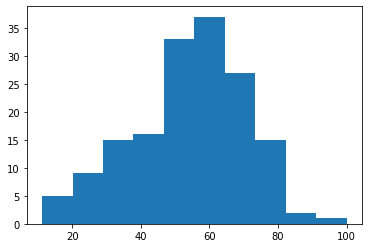

In [215]:
plt.hist(official_list["mean_rating"])

(array([10., 11., 13., 17., 32., 27., 23., 18.,  6.,  3.]),
 array([ 11.25 ,  20.125,  29.   ,  37.875,  46.75 ,  55.625,  64.5  ,
         73.375,  82.25 ,  91.125, 100.   ]),
 <a list of 10 Patch objects>)

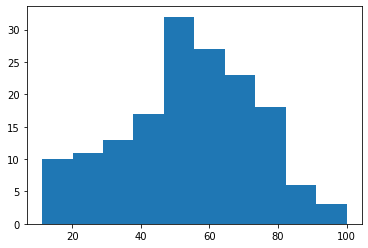

In [216]:
plt.hist(official_list["median_rating"])

In [218]:
official_list[official_list.mean_rating < 40].Role.value_counts()

Batsman          13
Bowler           11
All Rounder       6
Wicket Keeper     2
Name: Role, dtype: int64

In [224]:
official_list[official_list.mean_rating < 40].country.value_counts()

Australia      13
NewZealand      4
SouthAfrica     4
India           4
Pakistan        4
SriLanka        2
Bangladesh      1
Name: country, dtype: int64

In [219]:
official_list[official_list.mean_rating < 40].Player

7               Z Khan
10      Mohammed Shami
16           RG Sharma
18        SR Tendulkar
24             DC Boon
29          DW Fleming
30        AC Gilchrist
32           ML Hayden
35               B Lee
37          GD McGrath
40          RT Ponting
42            MA Starc
44             SW Tait
45            SK Warne
46           DA Warner
48            ME Waugh
49            SR Waugh
53     Shakib Al Hasan
69             SE Bond
70            TA Boult
72            MD Crowe
78           SB Styris
83          Imran Khan
86       Misbah-ul-Haq
89       Mushtaq Ahmed
91         Saeed Anwar
105     AB de Villiers
107           HH Gibbs
109          AC Hudson
113         L Klusener
122         TM Dilshan
130      KC Sangakkara
Name: Player, dtype: object

In [221]:
official_list[(official_list.mean_rating > 40) & (official_list.mean_rating<=50)].Role.value_counts()

Batsman          8
All Rounder      7
Bowler           6
Wicket Keeper    2
Name: Role, dtype: int64

In [222]:
official_list[(official_list.mean_rating > 40) & (official_list.mean_rating<=50)].Player

5          SC Ganguly
6         N Kapil Dev
8             V Kohli
17          J Srinath
19       Yuvraj Singh
21          MO Odumbe
28           AJ Finch
57           GA Gooch
61         AJ Stewart
74         MJ Guptill
84      Javed Miandad
88          Moin Khan
98        Wasim Akram
100           HM Amla
103       DJ Cullinan
110       Imran Tahir
112         G Kirsten
114       BM McMillan
115          M Morkel
123     ST Jayasuriya
126        SL Malinga
128    M Muralitharan
146         JE Taylor
Name: Player, dtype: object

In [67]:
official_price_list[official_price_list.Role=="Wicket Keeper"].sort_values(["mean_rating"]).head(30)[["Ct", "St", "Player", "mean_rating", "Mat"]]

,Ct,St,Player,mean_rating,Mat
30,45,7,AC Gilchrist,20.132275,31
130,41,13,KC Sangakkara,21.825397,37
88,23,7,Moin Khan,40.833333,20
61,21,2,AJ Stewart,49.613095,25
31,29,0,BJ Haddin,50.952381,15
52,21,7,Mushfiqur Rahim,55.396825,29
54,20,2,JC Buttler,56.777778,17
33,18,3,IA Healy,58.750000,14
101,31,0,MV Boucher,61.058201,25
155,8,1,BRM Taylor,61.746032,15


In [61]:
official_price_list[official_price_list.Role=="Bowler"].sort_values(["mean_rating"]).head(40)[["Player", "mean_rating", "Runs", "Ave", "Ct"]]

,Player,mean_rating,Runs,Ave,Ct
42,MA Starc,11.250000,68,8.5,8
45,SK Warne,12.794118,66,11,2
70,TA Boult,17.500000,10,10,8
35,B Lee,21.666667,28,9.33,12
89,Mushtaq Ahmed,23.319328,27,6.75,5
29,DW Fleming,25.294118,12,6,5
37,GD McGrath,26.021242,3,3,5
7,Z Khan,32.328042,52,5.77,10
44,SW Tait,33.134921,0,-,2
10,Mohammed Shami,35.208333,10,3.33,8


In [237]:
official_price_list[official_price_list.Role=="Batsman"].sort_values(["mean_rating"]).head(25).Price.value_counts()

1.5 Cr      9
2 Cr        7
1 Cr        6
50 lakhs    2
30 lakhs    1
Name: Price, dtype: int64

In [238]:
official_price_list[official_price_list.Role=="Batsman"].sort_values(["mean_rating"]).tail(25).Price.value_counts()

50 lakhs    7
30 lakhs    6
1 Cr        6
1.5 Cr      5
2 Cr        1
Name: Price, dtype: int64

In [239]:
official_price_list[official_price_list.Role=="Bowler"].sort_values(["mean_rating"]).head(25).Price.value_counts()

2 Cr        8
1 Cr        8
1.5 Cr      6
50 lakhs    3
Name: Price, dtype: int64

In [240]:
official_price_list[official_price_list.Role=="Bowler"].sort_values(["mean_rating"]).tail(25).Price.value_counts()

30 lakhs    10
1 Cr         6
1.5 Cr       5
50 lakhs     4
Name: Price, dtype: int64

In [7]:
official_price_list.sort_values(["mean_rating"]).head(40)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,...,bowling_strike_rate,4,5,Ct,St,num_seasons,Role,mean_rating,median_rating,Price
42,MA Starc,2015-2019,18,11,3,68,29,8.5,79,86.07,...,19.1,3,3,8,0,2,Bowler,11.250000,11.250000,2 Cr
45,SK Warne,1996-1999,17,9,3,66,24,11,72,91.66,...,30.5,4,0,2,0,2,Bowler,12.794118,12.794118,2 Cr
70,TA Boult,2015-2019,19,6,5,10,4,10,22,45.45,...,28.3,3,1,8,0,2,Bowler,17.500000,17.500000,2 Cr
32,ML Hayden,2003-2007,22,21,2,987,158,51.94,1062,92.93,...,-,-,-,7,0,2,Batsman,18.402778,18.402778,2 Cr
24,DC Boon,1987-1992,16,16,1,815,100,54.33,1117,72.96,...,-,0,0,2,0,2,Batsman,20.000000,20.000000,1 Cr
30,AC Gilchrist,1999-2007,31,31,1,1085,149,36.16,1107,98.01,...,-,-,-,45,7,3,Wicket Keeper,20.132275,14.285714,2 Cr
35,B Lee,2003-2011,17,4,1,28,15*,9.33,43,65.11,...,23.5,2,1,12,0,3,Bowler,21.666667,21.666667,2 Cr
130,KC Sangakkara,2003-2015,37,35,8,1532,124,56.74,1770,86.55,...,-,-,-,41,13,4,Wicket Keeper,21.825397,22.222222,2 Cr
89,Mushtaq Ahmed,1992-1996,15,5,1,27,17,6.75,58,46.55,...,31.1,0,0,5,0,2,Bowler,23.319328,23.319328,1 Cr
105,AB de Villiers,2007-2015,23,22,3,1207,162*,63.52,1029,117.29,...,21,0,0,12,0,3,Batsman,24.672793,19.047619,2 Cr


In [26]:
official_price_list.Price.unique()

array(['50 lakhs', '1 Cr', '2 Cr', '1.5 Cr', '30 lakhs'], dtype=object)

In [39]:
official_price_list[official_price_list.Price.isin(["1 Cr", "50 lakhs", "30 lakhs"])].sort_values(["mean_rating"]).head(20)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,...,bowling_strike_rate,4,5,Ct,St,num_seasons,Role,mean_rating,median_rating,Price
24,DC Boon,1987-1992,16,16,1,815,100,54.33,1117,72.96,...,-,0,0,2,0,2,Batsman,20.000000,20.000000,1 Cr
89,Mushtaq Ahmed,1992-1996,15,5,1,27,17,6.75,58,46.55,...,31.1,0,0,5,0,2,Bowler,23.319328,23.319328,1 Cr
44,SW Tait,2007-2011,18,1,1,0,0*,-,1,0.00,...,24,1,0,2,0,2,Bowler,33.134921,33.134921,1 Cr
109,AC Hudson,1992-1996,12,12,0,571,161,47.58,738,77.37,...,-,-,-,2,0,2,Batsman,35.625000,35.625000,30 lakhs
69,SE Bond,2003-2007,16,5,3,7,3,3.5,25,28.00,...,29.5,0,1,6,0,2,Bowler,35.972222,35.972222,1 Cr
86,Misbah-ul-Haq,2011-2015,15,13,1,598,83*,49.83,802,74.56,...,-,-,-,6,0,2,Batsman,36.967419,36.967419,1 Cr
91,Saeed Anwar,1996-2003,21,21,4,915,113*,53.82,1157,79.08,...,24,0,0,3,0,3,Batsman,37.132353,25.000000,1 Cr
72,MD Crowe,1983-1992,21,21,5,880,100*,55,1053,83.57,...,108,0,0,8,0,3,Batsman,38.333333,38.333333,1 Cr
115,M Morkel,2011-2015,14,4,1,12,6*,4,33,36.36,...,25,0,0,4,0,2,Bowler,44.285714,44.285714,50 lakhs
146,JE Taylor,2007-2015,14,7,1,74,15*,12.33,89,83.14,...,31.6,0,0,1,0,3,Bowler,45.277778,45.277778,50 lakhs


In [40]:
official_price_list[official_price_list.Player.isin(["JE Taylor","M Morkel"])]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,...,bowling_strike_rate,4,5,Ct,St,num_seasons,Role,mean_rating,median_rating,Price
115,M Morkel,2011-2015,14,4,1,12,6*,4,33,36.36,...,25,0,0,4,0,2,Bowler,44.285714,44.285714,50 lakhs
146,JE Taylor,2007-2015,14,7,1,74,15*,12.33,89,83.14,...,31.6,0,0,1,0,3,Bowler,45.277778,45.277778,50 lakhs


In [46]:
official_price_list[(official_price_list.Role=="Batsman") & (official_price_list.Price.isin(["50 lakhs", "30 lakhs"]))].sort_values(["mean_rating"])[["Player", "Runs", "Ave", "mean_rating"]]

,Player,Runs,Ave,mean_rating
109,AC Hudson,571,47.58,35.625000
103,DJ Cullinan,471,39.25,48.345588
100,HM Amla,842,42.1,48.471178
131,WU Tharanga,697,36.68,56.878307
73,SP Fleming,1075,35.83,58.455882
145,RR Sarwan,739,46.18,64.947090
79,LRPL Taylor,1002,37.11,65.411445
59,GA Hick,635,42.33,66.307190
143,RB Richardson,639,37.58,67.500000
62,GP Thorpe,379,54.14,69.117647
